Business Formation Analysis First EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("data/bfs_monthly.csv")

df.head()


,sa,naics_sector,series,geo,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,U,TOTAL,BA_BA,US,2025,497030,440230,497911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,U,NAICS11,BA_BA,US,2025,5141,4258,4398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,U,NAICS21,BA_BA,US,2025,547,472,511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,U,NAICS22,BA_BA,US,2025,689,663,697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,U,NAICS23,BA_BA,US,2025,49525,44621,47136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_long = df.melt(
    id_vars=["sa", "naics_sector", "series", "geo", "year"],
    value_vars=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],
    var_name="month",
    value_name="value"
)

# 3. Convert 'month' to number format (e.g., jan -> 1, feb -> 2, etc.)
month_map = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4,
    "may": 5, "jun": 6, "jul": 7, "aug": 8,
    "sep": 9, "oct": 10, "nov": 11, "dec": 12
}
df_long["month"] = df_long["month"].str.lower().map(month_map)

# 4. Create a proper datetime column
df_long["year_month"] = pd.to_datetime(df_long["year"].astype(str) + "-" + df_long["month"].astype(str))

# 5. Check it out
df_long.head()

,sa,naics_sector,series,geo,year,month,value,year_month
0,U,TOTAL,BA_BA,US,2025,1,497030,2025-01-01
1,U,NAICS11,BA_BA,US,2025,1,5141,2025-01-01
2,U,NAICS21,BA_BA,US,2025,1,547,2025-01-01
3,U,NAICS22,BA_BA,US,2025,1,689,2025-01-01
4,U,NAICS23,BA_BA,US,2025,1,49525,2025-01-01


In [11]:
df_long.info()
df_long.describe()
df_long.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416784 entries, 0 to 416783
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   sa            416784 non-null  object        
 1   naics_sector  416784 non-null  object        
 2   series        416784 non-null  object        
 3   geo           416784 non-null  object        
 4   year          416784 non-null  int64         
 5   month         416784 non-null  int64         
 6   value         395808 non-null  object        
 7   year_month    416784 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 25.4+ MB


sa                  0
naics_sector        0
series              0
geo                 0
year                0
month               0
value           20976
year_month          0
dtype: int64

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
df = df.dropna()  # or use df.fillna(method='ffill'), depending on context

#These missing values were not concentrated in one location or sector, but rather spread throughout the dataset.

# Convert date columns if necessary
df['year_month'] = pd.to_datetime(df['year'].astype(str) + '-' + df_long['month'].astype(str))


sa              0
naics_sector    0
series          0
geo             0
year            0
jan             0
feb             0
mar             0
apr             0
may             0
jun             0
jul             0
aug             0
sep             0
oct             0
nov             0
dec             0
year_month      0
dtype: int64


In [16]:
# value — This column contains the number of business applications for a given month, sector, and location. It had 20,976 missing values out of 416,784 rows (~5%).
#I dropped rows with missing values in the value column.

df_long = df_long.dropna(subset=["value"])
df_long.describe()

,year,month,year_month
count,395808.000000,395808.000000,395808
mean,2013.933180,6.534562,2014-05-24 05:56:07.741935360
min,2004.000000,1.000000,2004-07-01 00:00:00
25%,2009.000000,3.000000,2009-06-01 00:00:00
50%,2014.000000,7.000000,2014-05-01 00:00:00
75%,2019.000000,10.000000,2019-04-01 00:00:00
max,2025.000000,12.000000,2025-03-01 00:00:00
std,5.820886,3.463878,NaN


In [14]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395808 entries, 0 to 416783
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   sa            395808 non-null  object        
 1   naics_sector  395808 non-null  object        
 2   series        395808 non-null  object        
 3   geo           395808 non-null  object        
 4   year          395808 non-null  int64         
 5   month         395808 non-null  int64         
 6   value         395808 non-null  object        
 7   year_month    395808 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 27.2+ MB


In [7]:
print(df_long["series"].unique())        # e.g., BA_BA, BA_HR, BF_BF4Q, etc.
print(df_long["naics_sector"].unique())  # e.g., TOTAL, NAICS11 (agriculture), etc.
print(df_long["geo"].unique())           # e.g., US or state codes


['BA_BA' 'BA_CBA' 'BA_HBA' 'BA_WBA' 'BF_PBF4Q' 'BF_PBF8Q' 'BF_SBF4Q'
 'BF_SBF8Q' 'BF_BF4Q' 'BF_DUR4Q' 'BF_BF8Q' 'BF_DUR8Q']
['TOTAL' 'NAICS11' 'NAICS21' 'NAICS22' 'NAICS23' 'NAICSMNF' 'NAICS42'
 'NAICSRET' 'NAICSTW' 'NAICS51' 'NAICS52' 'NAICS53' 'NAICS54' 'NAICS55'
 'NAICS56' 'NAICS61' 'NAICS62' 'NAICS71' 'NAICS72' 'NAICS81' 'NONAICS']
['US' 'NO' 'MW' 'SO' 'WE' 'AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC'
 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI'
 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK'
 'OR' 'PA' 'RI' 'SC' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']


In [8]:
df_filtered = df_long[
    (df_long["series"] == "BA_BA") &
    (df_long["naics_sector"] == "TOTAL") &
    (df_long["geo"] == "US")
]


/tmp/ipykernel_2647/1991599150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value_smoothed'] = df_filtered['value'].rolling(window=3).mean()
/tmp/ipykernel_2647/1991599150.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


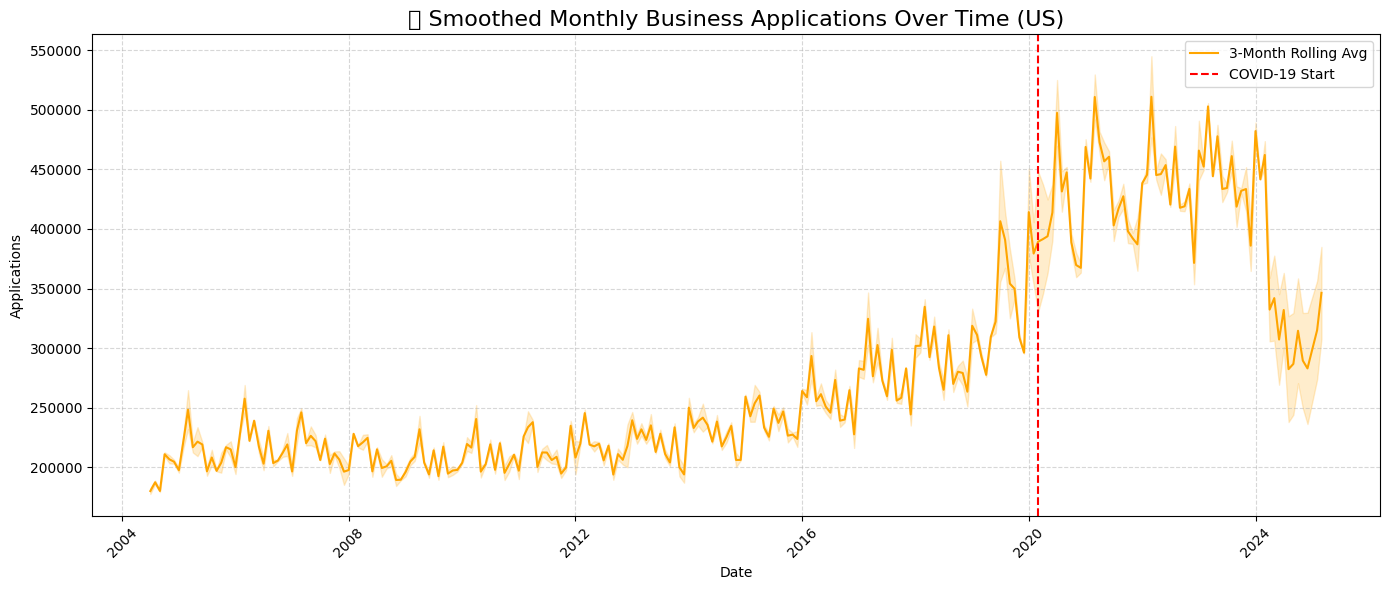

In [9]:
df_filtered['value_smoothed'] = df_filtered['value'].rolling(window=3).mean()

plt.figure(figsize=(14,6))
sns.lineplot(data=df_filtered, x="year_month", y="value_smoothed", label="3-Month Rolling Avg", color="orange")

plt.title("📈 Smoothed Monthly Business Applications Over Time (US)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Applications")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label='COVID-19 Start')
plt.legend()

plt.show()


### 📊 Trend Analysis: Business Applications Over Time (2004–2025)

- From 2004 to 2015, business applications in the US remained relatively stable (~200k/month).
- A noticeable upward trend began around 2016, possibly due to improving economic conditions or tech accessibility.
- A significant surge occurred in 2020–2021, coinciding with the COVID-19 pandemic, likely due to job loss, digital shift, and increased interest in entrepreneurship.
- Applications have declined since the 2021 peak but remain above pre-pandemic levels, suggesting a potential long-term shift in the entrepreneurial landscape.

📌 Next Steps:
- Explore trends by sector (`naics_sector`) or region (`geo`)
- Analyze business **formations** vs. **applications**
- Identify seasonality patterns if zooming into month-level again


In [10]:
df_filtered.rename(columns={'value': 'applications'}, inplace=True)
print(df_filtered)


/tmp/ipykernel_2647/2039081839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'value': 'applications'}, inplace=True)


       sa naics_sector series geo  year  month applications year_month  \
0       U        TOTAL  BA_BA  US  2025      1       497030 2025-01-01   
21      A        TOTAL  BA_BA  US  2025      1       393232 2025-01-01   
1216    U        TOTAL  BA_BA  US  2024      1       577568 2024-01-01   
1237    A        TOTAL  BA_BA  US  2024      1       453575 2024-01-01   
2432    U        TOTAL  BA_BA  US  2023      1       441031 2023-01-01   
...    ..          ...    ...  ..   ...    ...          ...        ...   
411789  A        TOTAL  BA_BA  US  2006     12       247474 2006-12-01   
413440  U        TOTAL  BA_BA  US  2005     12       183942 2005-12-01   
413461  A        TOTAL  BA_BA  US  2005     12       234221 2005-12-01   
415112  U        TOTAL  BA_BA  US  2004     12       190986 2004-12-01   
415133  A        TOTAL  BA_BA  US  2004     12       193836 2004-12-01   

        value_smoothed  
0                  NaN  
21                 NaN  
1216     489276.666667  
1237     47

In [11]:
# Ensure 'applications' is numeric
df_filtered['applications'] = pd.to_numeric(df_filtered['applications'], errors='coerce')


/tmp/ipykernel_2647/1694115699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['applications'] = pd.to_numeric(df_filtered['applications'], errors='coerce')


/tmp/ipykernel_2647/804563054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'value': 'applications'}, inplace=True)
/tmp/ipykernel_2647/804563054.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


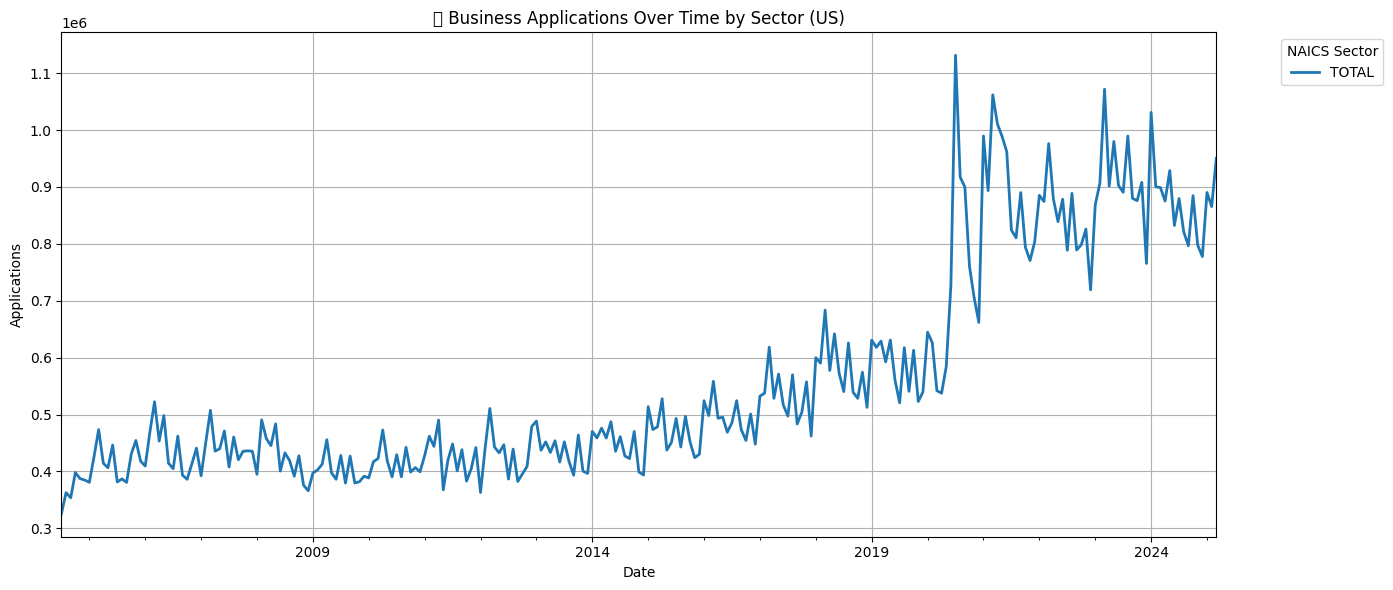

In [12]:
df_filtered.rename(columns={'value': 'applications'}, inplace=True)
df_us = df_filtered[df_filtered['geo'] == 'US']
# Group applications by sector and year_month
sector_trends = df_us.groupby(['naics_sector', 'year_month'])['applications'].sum().reset_index()

# Pivot to reshape for plotting
pivot_sector = sector_trends.pivot(index='year_month', columns='naics_sector', values='applications')

# Plot
pivot_sector.plot(figsize=(14, 6), linewidth=2)
plt.title('📊 Business Applications Over Time by Sector (US)')
plt.ylabel('Applications')
plt.xlabel('Date')
plt.legend(title='NAICS Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()




/tmp/ipykernel_2647/2720897096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['month'] = df_filtered['year_month'].dt.month_name()


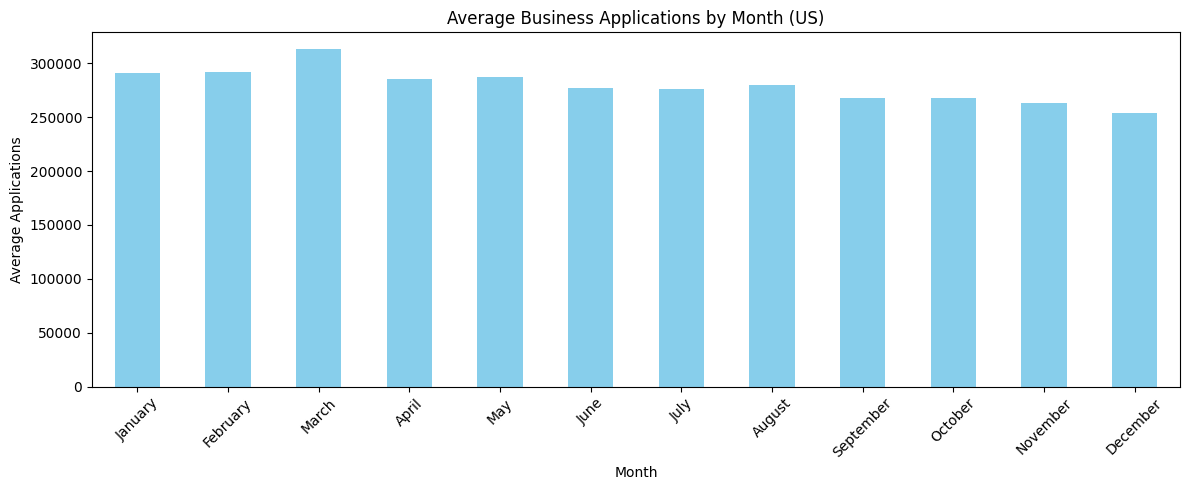

In [13]:
# Extract month name
df_filtered['month'] = df_filtered['year_month'].dt.month_name()

# Calculate monthly averages for US data
monthly_avg = df_filtered[df_filtered['geo'] == 'US'].groupby('month')['applications'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot
plt.figure(figsize=(12, 5))
monthly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Business Applications by Month (US)')
plt.ylabel('Average Applications')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# -*- coding: utf-8 -*-
"""
Business Applications Regression Model
"""

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Load the preprocessed data
# (Assuming you've already done the filtering and created the lag feature)
data = pd.read_csv('output.csv')

# Filter to US level data and seasonally adjusted series
data = data[data['geo'] == 'US']
data = data[data['sa'].isin(['S', 'U'])]

# Sort data by date to ensure proper order for time series
data['date'] = pd.to_datetime(data['year_month'])
data = data.sort_values('date')

# Create lag feature (previous month's applications)
data['applications_lag1'] = data['applications'].shift(1)

# Drop the first row which has no lag value
# Since the project focuses on national-level trend analysis (geo == 'US' and naics_sector == 'TOTAL'), removing these rows does not affect the integrity or representativeness of the analysis.
# Additionally, because value is the key numeric input used to calculate features (like lagged applications), imputing with a mean or zero could distort trend signals or time series patterns.
data = data.dropna(subset=['applications_lag1'])

# Create month indicators (one-hot encoding)
data['month_num'] = data['date'].dt.month
month_dummies = pd.get_dummies(data['month_num'], prefix='month')
data = pd.concat([data, month_dummies], axis=1)

# Additional features you might consider
data['year_numeric'] = data['date'].dt.year
data['is_recession'] = np.where(
    ((data['date'] >= '2020-03-01') & (data['date'] <= '2020-07-01')), 1, 0
)

# Define features and target
X = data[['applications_lag1', 'year_numeric'] + 
         [col for col in data.columns if col.startswith('month_')]]
y = data['applications']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Print split information
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Evaluation:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")

# Feature importance
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

print("\nFeature Importance:")
print(coefficients)


# Example prediction for a new scenario
# Let's create a scenario: What if applications in the previous month were 450,000?
# And we want to predict for January 2025

# Create a sample data point with ALL features that were used in training
new_data = pd.DataFrame({
    'applications_lag1': [450000],
    'year_numeric': [2025],
    'month_num': [1]  # This was missing in the original code (January = 1)
})

# Add month dummy variables (for January)
for month in range(1, 13):
    new_data[f'month_{month}'] = 1 if month == 1 else 0

# Make prediction
prediction = model.predict(new_data)[0]
print(f"\nScenario: Previous month had 450,000 applications, predicting for January 2025")
print(f"Predicted business applications: {prediction:.0f}")

# Add month dummy variables (assuming January = 1)
for month in range(1, 13):
    new_data[f'month_{month}'] = 1 if month == 1 else 0

# Make prediction
prediction = model.predict(new_data)[0]
print(f"\nScenario: Previous month had 450,000 applications, predicting for January 2025")
print(f"Predicted business applications: {prediction:.0f}")

# Save the model
import pickle
with open('business_applications_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("\nModel saved as 'business_applications_model.pkl'")

Training set size: 198 samples
Testing set size: 50 samples

Model Evaluation:
Training RMSE: 48841.22
Testing RMSE: 56931.93
Training R²: 0.7599
Testing R²: 0.7446

Feature Importance:
              Feature   Coefficient
5             month_3  24903.741660
3             month_1  21019.481310
10            month_8  20129.654902
1        year_numeric   7037.549714
13           month_11   5627.608887
12           month_10   4165.756161
9             month_7   1348.684759
0   applications_lag1      0.518378
7             month_5  -2578.452594
2           month_num  -3663.600417
14           month_12  -5052.114269
11            month_9  -7837.114621
8             month_6 -12542.669501
4             month_2 -21306.195485
6             month_4 -27878.381209

Scenario: Previous month had 450,000 applications, predicting for January 2025
Predicted business applications: 483523

Scenario: Previous month had 450,000 applications, predicting for January 2025
Predicted business applications: 48352

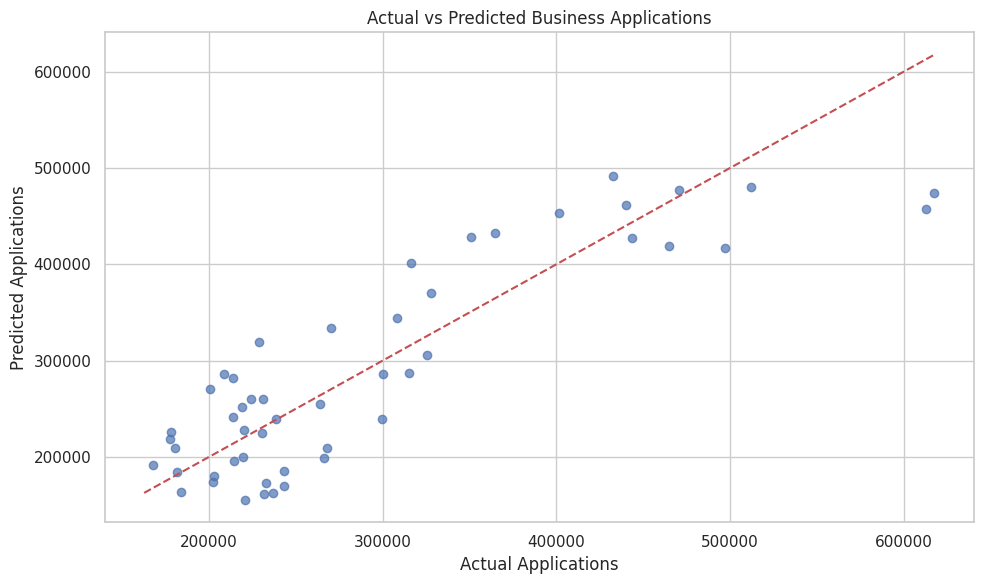

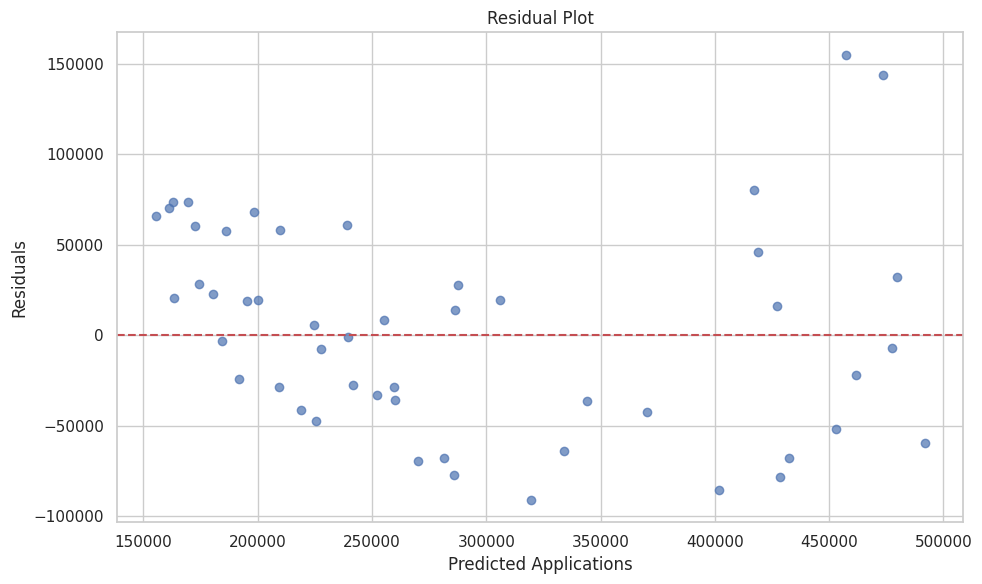

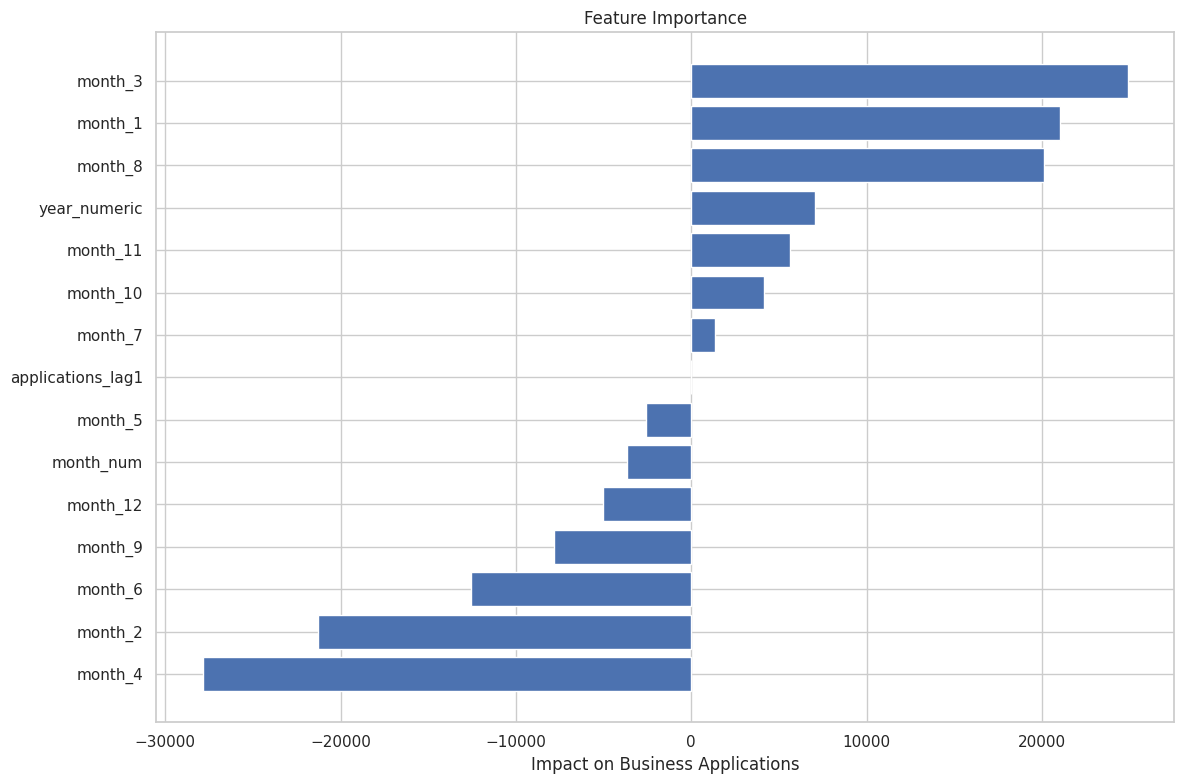

In [19]:
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Applications')
plt.ylabel('Predicted Applications')
plt.title('Actual vs Predicted Business Applications')
plt.tight_layout()
plt.savefig('prediction_plot.png')

# Residuals Plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Applications')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.savefig('residual_plot.png')

# Feature Importance Visualization
coefficients = coefficients.sort_values('Coefficient')
plt.figure(figsize=(12, 8))
plt.barh(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Impact on Business Applications')
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig('feature_importance.png')

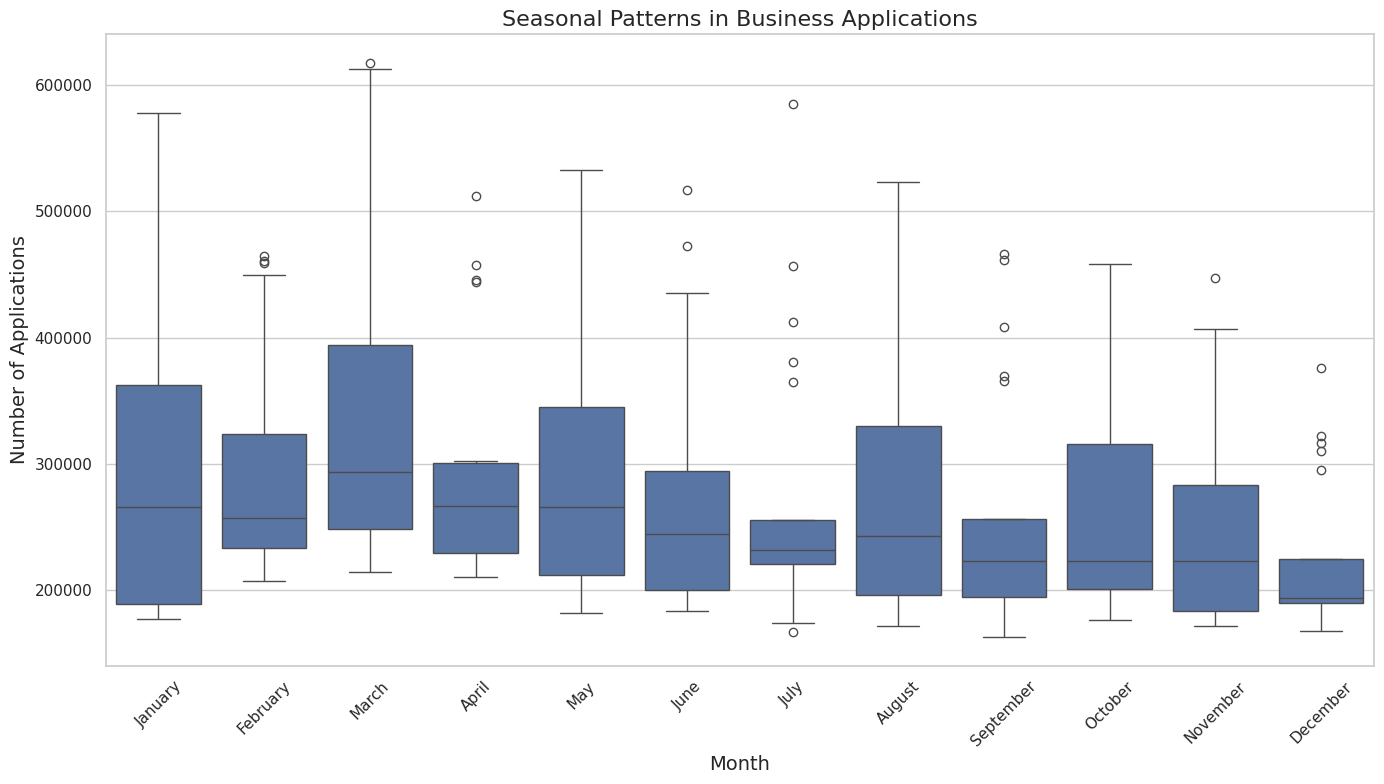

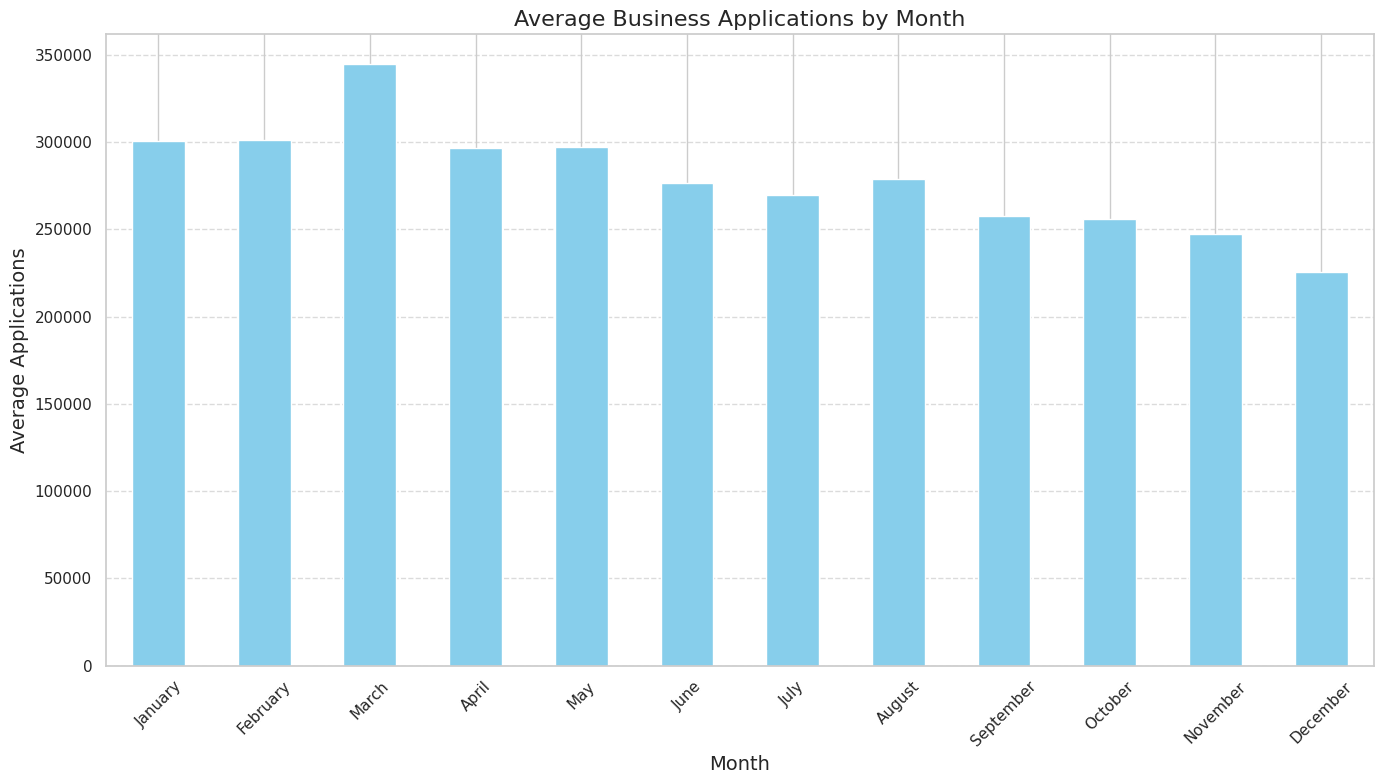


Business Question 1: What seasonal patterns exist in business applications?

Key Findings:
- Highest average applications: March (344487)
- Lowest average applications: December (225347)
- Difference between highest and lowest: 119140


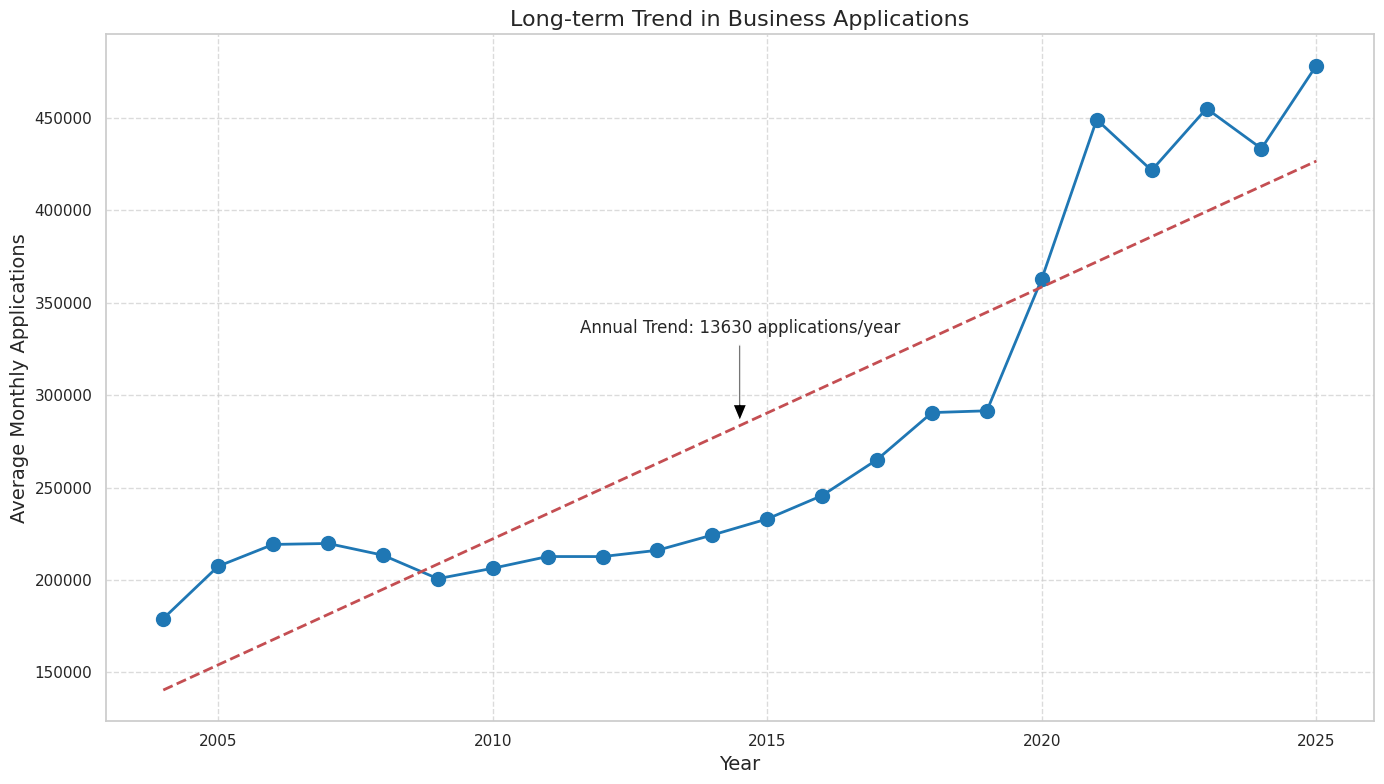


Business Question 2: Is there a long-term trend in business applications?

Key Findings:
- Average annual increase: 13630 applications per year
- From 2004 to 2025: 167.1% overall growth


/tmp/ipykernel_2647/2289961446.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_num'] = data['date'].dt.month


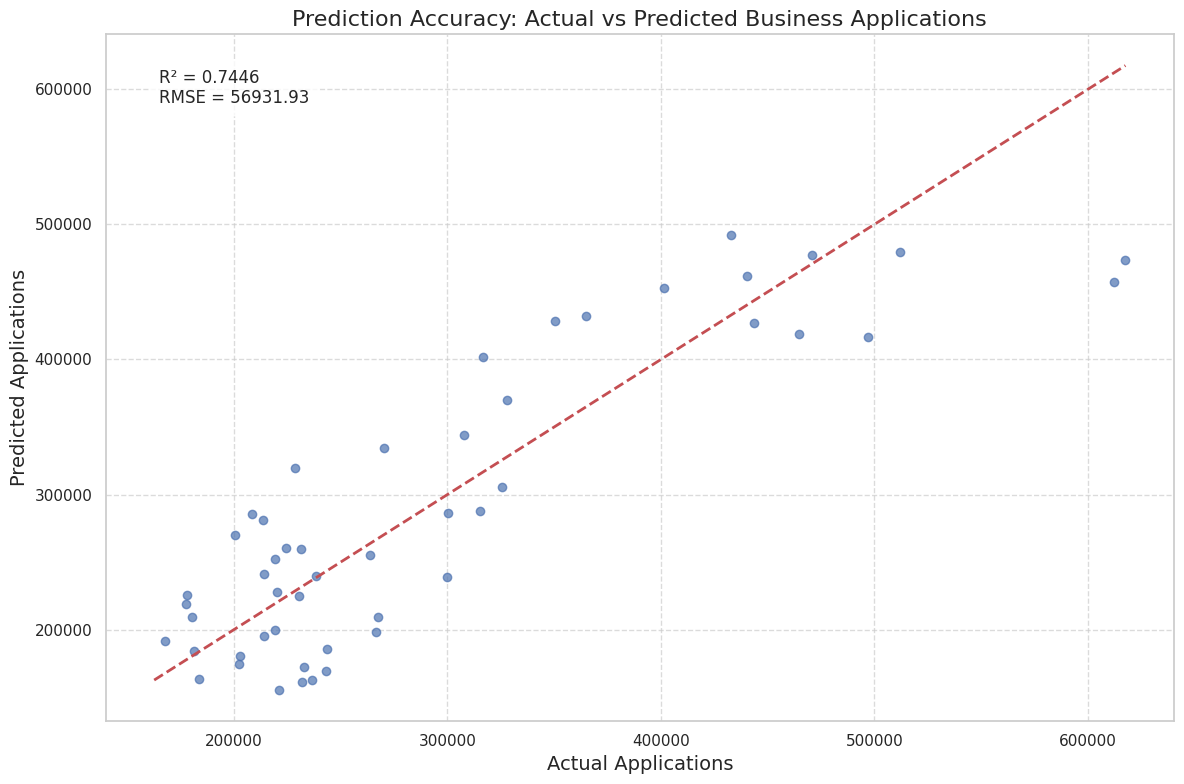


Business Question 3: Can we accurately predict future business applications?

Key Findings:
- Test set R² (accuracy): 0.7446
- Test set RMSE: 56931.93 applications
- The model explains 74.5% of the variation in business applications
- Average error: 20.4% of mean applications


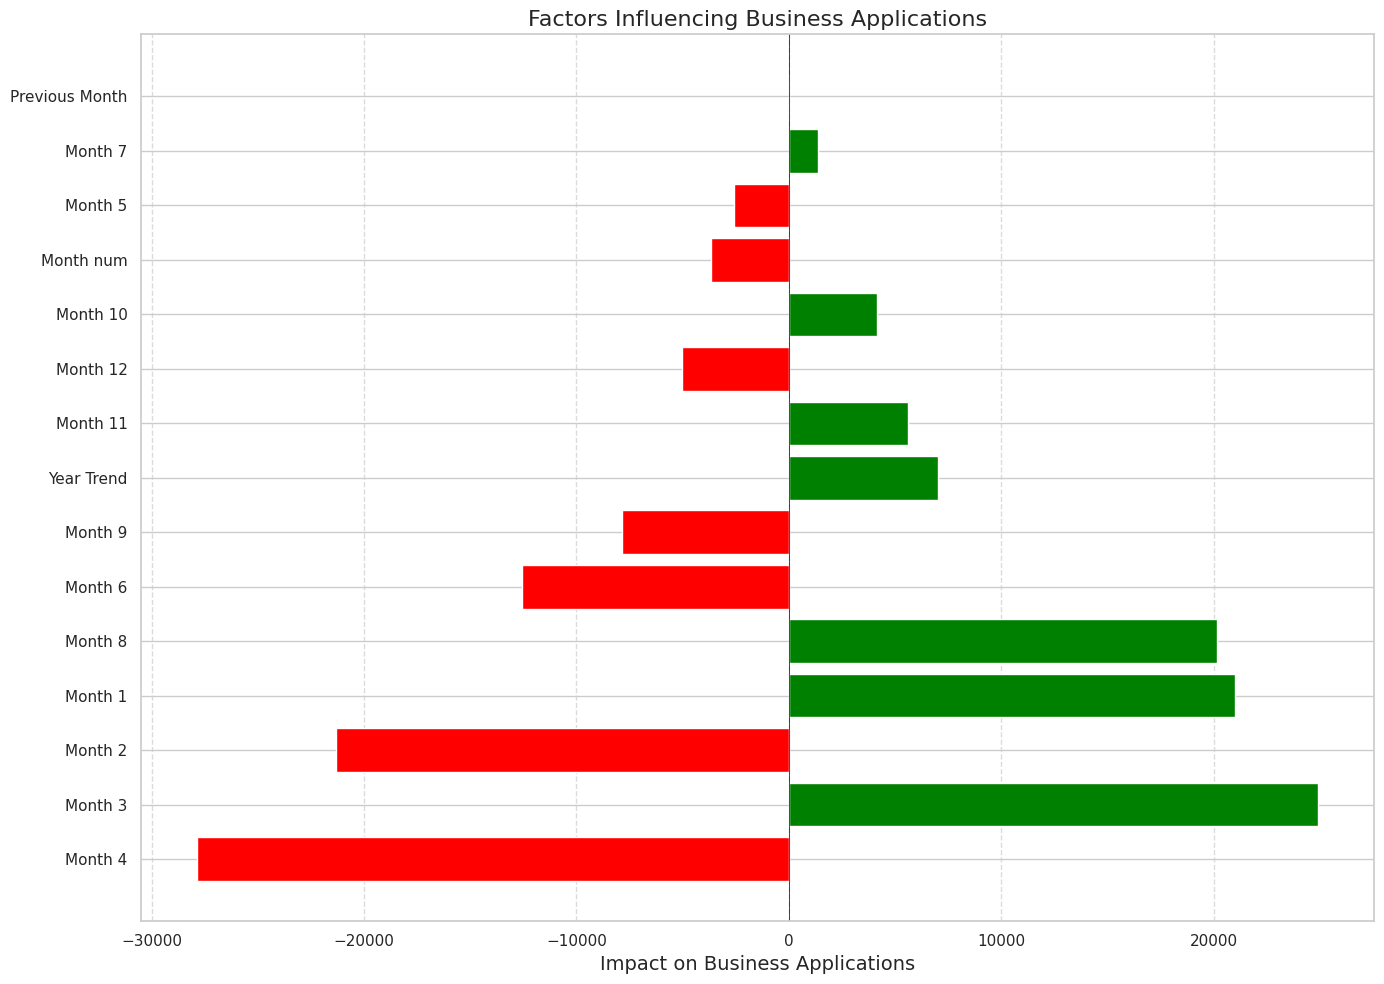


Business Question 4: Which factors most strongly influence business applications?

Key Findings:
Top positive factors:
  1. Month 3: +24904 applications
  2. Month 1: +21019 applications
  3. Month 8: +20130 applications

Top negative factors:
  1. Month 4: -27878 applications
  2. Month 2: -21306 applications
  3. Month 6: -12543 applications

- Previous month's applications: 0.518 applications per application
- Annual trend: 7038 applications per year

Scenario Analysis: January 2025 Business Applications Prediction

Scenario: Previous month had 450,000 applications, what can we expect in January 2025?
Predicted business applications: 483523


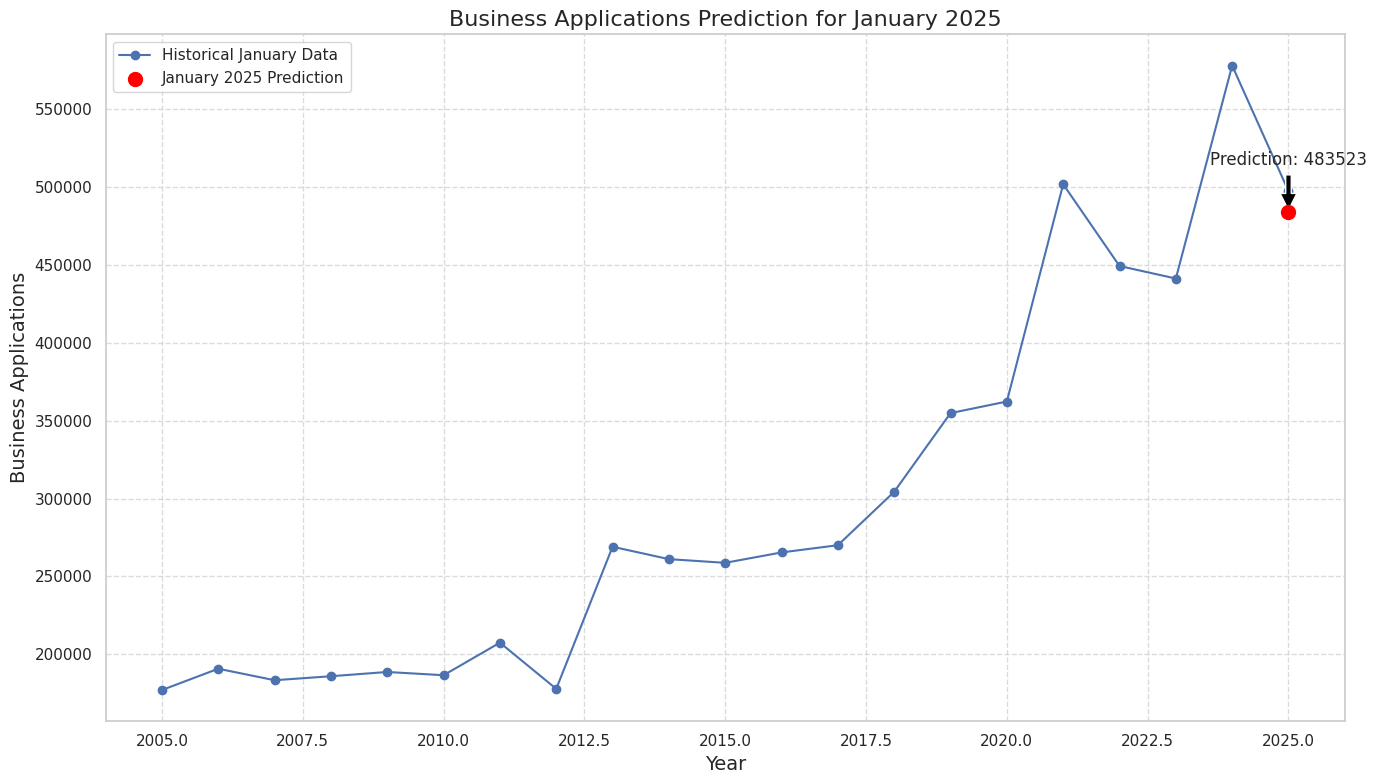


Summary of All Business Questions Analysis Complete!


In [20]:
# -*- coding: utf-8 -*-
"""
Business Applications Analysis - Key Business Questions
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load the preprocessed data
# (Make sure to update this path to your actual data file)
data = pd.read_csv('output.csv')

# Filter to US level data and seasonally adjusted series
data = data[data['geo'] == 'US']
data = data[data['sa'].isin(['S', 'U'])]

# Sort data by date to ensure proper order for time series
data['date'] = pd.to_datetime(data['year_month'])
data = data.sort_values('date')

#------------------------------------------------------------
# BUSINESS QUESTION 1: What seasonal patterns exist in business applications?
#------------------------------------------------------------

def analyze_seasonal_patterns(data):
    """
    Analyze and visualize seasonal patterns in business applications.
    
    Parameters:
    data (DataFrame): The dataset containing business applications data
    
    Returns:
    None: Displays and saves visualizations
    """
    # Create a month name column for better visualization
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
    
    # Plot seasonal patterns
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='month', y='applications', data=data, order=month_order)
    plt.title('Seasonal Patterns in Business Applications', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Applications', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('seasonal_patterns.png')
    plt.show()
    
    # Calculate average applications by month
    monthly_avg = data.groupby('month')['applications'].mean().reindex(month_order)
    
    # Plot monthly averages
    plt.figure(figsize=(14, 8))
    monthly_avg.plot(kind='bar', color='skyblue')
    plt.title('Average Business Applications by Month', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Average Applications', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('monthly_averages.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 1: What seasonal patterns exist in business applications?")
    print("\nKey Findings:")
    print(f"- Highest average applications: {monthly_avg.idxmax()} ({monthly_avg.max():.0f})")
    print(f"- Lowest average applications: {monthly_avg.idxmin()} ({monthly_avg.min():.0f})")
    print(f"- Difference between highest and lowest: {(monthly_avg.max() - monthly_avg.min()):.0f}")

# Call the function
analyze_seasonal_patterns(data)

#------------------------------------------------------------
# BUSINESS QUESTION 2: Is there a long-term trend in business applications?
#------------------------------------------------------------

def analyze_longterm_trend(data):
    """
    Analyze and visualize the long-term trend in business applications.
    
    Parameters:
    data (DataFrame): The dataset containing business applications data
    
    Returns:
    None: Displays and saves visualizations
    """
    # Create yearly averages
    yearly_data = data.groupby('year')['applications'].agg(['mean', 'count']).reset_index()
    
    # Plot the trend
    plt.figure(figsize=(14, 8))
    plt.plot(yearly_data['year'], yearly_data['mean'], marker='o', linestyle='-', 
             linewidth=2, markersize=10, color='#1f77b4')
    
    # Add a trend line
    z = np.polyfit(yearly_data['year'], yearly_data['mean'], 1)
    p = np.poly1d(z)
    plt.plot(yearly_data['year'], p(yearly_data['year']), "r--", linewidth=2)
    
    # Calculate the annual growth rate
    growth_rate = z[0]
    
    plt.title('Long-term Trend in Business Applications', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Monthly Applications', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Annotate the trend line
    plt.annotate(f'Annual Trend: {growth_rate:.0f} applications/year',
                xy=(yearly_data['year'].mean(), p(yearly_data['year'].mean())),
                xytext=(yearly_data['year'].mean(), p(yearly_data['year'].mean()) + 50000),
                arrowprops=dict(facecolor='black', shrink=0.05, width=1.5, headwidth=10),
                fontsize=12, ha='center')
    
    plt.tight_layout()
    plt.savefig('longterm_trend.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 2: Is there a long-term trend in business applications?")
    print("\nKey Findings:")
    print(f"- Average annual increase: {growth_rate:.0f} applications per year")
    earliest_year = yearly_data['year'].min()
    latest_year = yearly_data['year'].max()
    earliest_avg = yearly_data.loc[yearly_data['year'] == earliest_year, 'mean'].values[0]
    latest_avg = yearly_data.loc[yearly_data['year'] == latest_year, 'mean'].values[0]
    percent_change = ((latest_avg - earliest_avg) / earliest_avg) * 100
    print(f"- From {earliest_year} to {latest_year}: {percent_change:.1f}% overall growth")

# Call the function
analyze_longterm_trend(data)

#------------------------------------------------------------
# BUSINESS QUESTION 3: Can we accurately predict future business applications?
#------------------------------------------------------------

def evaluate_prediction_accuracy(data):
    """
    Evaluate and visualize the accuracy of our prediction model.
    
    Parameters:
    data (DataFrame): The dataset containing business applications data
    
    Returns:
    tuple: The trained model and feature list for use in other functions
    """
    # Create lag feature (previous month's applications)
    data['applications_lag1'] = data['applications'].shift(1)
    
    # Drop rows with missing values
    data = data.dropna(subset=['applications_lag1'])
    
    # Create month indicators (one-hot encoding)
    data['month_num'] = data['date'].dt.month
    month_dummies = pd.get_dummies(data['month_num'], prefix='month')
    data = pd.concat([data, month_dummies], axis=1)
    
    # Define features and target
    data['year_numeric'] = data['date'].dt.year
    
    X = data[['applications_lag1', 'year_numeric'] + 
             [col for col in data.columns if col.startswith('month_')]]
    y = data['applications']
    
    # Split the data (80% train, 20% test)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)
    
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Plot actual vs predicted values
    plt.figure(figsize=(12, 8))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
    
    # Add metrics to plot
    plt.annotate(f'R² = {test_r2:.4f}\nRMSE = {test_rmse:.2f}',
                 xy=(0.05, 0.95), xycoords='axes fraction',
                 fontsize=12, ha='left', va='top',
                 bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    plt.xlabel('Actual Applications', fontsize=14)
    plt.ylabel('Predicted Applications', fontsize=14)
    plt.title('Prediction Accuracy: Actual vs Predicted Business Applications', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('prediction_accuracy.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 3: Can we accurately predict future business applications?")
    print("\nKey Findings:")
    print(f"- Test set R² (accuracy): {test_r2:.4f}")
    print(f"- Test set RMSE: {test_rmse:.2f} applications")
    print(f"- The model explains {test_r2*100:.1f}% of the variation in business applications")
    avg_applications = data['applications'].mean()
    print(f"- Average error: {(test_rmse/avg_applications)*100:.1f}% of mean applications")
    
    return model, X.columns.tolist()

# Call the function
model, feature_names = evaluate_prediction_accuracy(data)

#------------------------------------------------------------
# BUSINESS QUESTION 4: Which factors have the strongest influence on business applications?
#------------------------------------------------------------

def analyze_feature_importance(model, feature_names):
    """
    Analyze and visualize which factors most strongly influence business applications.
    
    Parameters:
    model: The trained LinearRegression model
    feature_names: List of feature names used in the model
    
    Returns:
    None: Displays and saves visualizations
    """
    # Create feature importance dataframe
    coefficients = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': model.coef_
    })
    
    # Clean up feature names for display
    coefficients['Feature'] = coefficients['Feature'].apply(lambda x: 
        x.replace('month_', 'Month ') if x.startswith('month_') else
        'Previous Month' if x == 'applications_lag1' else
        'Year Trend' if x == 'year_numeric' else x
    )
    
    # Sort by absolute value for visualization
    coefficients = coefficients.reindex(
        coefficients['Coefficient'].abs().sort_values(ascending=False).index
    )
    
    # Plot horizontal bar chart
    plt.figure(figsize=(14, 10))
    
    # Create color map based on coefficient sign
    colors = ['green' if c > 0 else 'red' for c in coefficients['Coefficient']]
    
    plt.barh(coefficients['Feature'], coefficients['Coefficient'], color=colors)
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.xlabel('Impact on Business Applications', fontsize=14)
    plt.title('Factors Influencing Business Applications', fontsize=16)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()
    
    # Print the findings
    print("\nBusiness Question 4: Which factors most strongly influence business applications?")
    print("\nKey Findings:")
    
    # Get top positive and negative factors
    pos_factors = coefficients[coefficients['Coefficient'] > 0].head(3)
    neg_factors = coefficients[coefficients['Coefficient'] < 0].head(3)
    
    print("Top positive factors:")
    for i, (_, row) in enumerate(pos_factors.iterrows(), 1):
        print(f"  {i}. {row['Feature']}: +{row['Coefficient']:.0f} applications")
        
    print("\nTop negative factors:")
    for i, (_, row) in enumerate(neg_factors.iterrows(), 1):
        print(f"  {i}. {row['Feature']}: {row['Coefficient']:.0f} applications")
        
    # Check lag and year trend impact
    lag_impact = coefficients.loc[coefficients['Feature'] == 'Previous Month', 'Coefficient'].values[0]
    year_impact = coefficients.loc[coefficients['Feature'] == 'Year Trend', 'Coefficient'].values[0]
    
    print(f"\n- Previous month's applications: {lag_impact:.3f} applications per application")
    print(f"- Annual trend: {year_impact:.0f} applications per year")

# Call the function
analyze_feature_importance(model, feature_names)

#------------------------------------------------------------
# Prediction Scenario
#------------------------------------------------------------

def predict_business_scenario():
    """
    Create and visualize a prediction scenario for January 2025.
    
    Parameters:
    None (uses already trained model)
    
    Returns:
    None: Displays and saves visualization
    """
    print("\nScenario Analysis: January 2025 Business Applications Prediction")
    print("\nScenario: Previous month had 450,000 applications, what can we expect in January 2025?")
    
    # Create a sample data point
    new_data = pd.DataFrame({
        'applications_lag1': [450000],
        'year_numeric': [2025],
        'month_num': [1]  # January
    })
    
    # Add month dummy variables
    for month in range(1, 13):
        new_data[f'month_{month}'] = 1 if month == 1 else 0
    
    # Make prediction
    prediction = model.predict(new_data)[0]
    
    print(f"Predicted business applications: {prediction:.0f}")
    
    # Create a visualization showing context
    # Get historical January data
    historical_jan = data[data['month'] == 'January'].sort_values('year')
    
    plt.figure(figsize=(14, 8))
    
    # Plot historical January data
    plt.plot(historical_jan['year'], historical_jan['applications'], 
             marker='o', linestyle='-', label='Historical January Data')
    
    # Add our prediction
    plt.scatter(2025, prediction, color='red', s=100, zorder=5, 
                label='January 2025 Prediction')
    
    # Add annotation
    plt.annotate(f'Prediction: {prediction:.0f}',
                xy=(2025, prediction),
                xytext=(2025, prediction + 30000),
                arrowprops=dict(facecolor='black', shrink=0.05),
                ha='center')
    
    plt.title('Business Applications Prediction for January 2025', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Business Applications', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.savefig('january_2025_prediction.png')
    plt.show()
    
    return prediction

# Call the function
prediction_result = predict_business_scenario()

print("\nSummary of All Business Questions Analysis Complete!")